<a href="https://colab.research.google.com/github/venuannamdas/mini_proj/blob/master/Mini_project_Colab_Version.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A project on Data Analytics – Aug 2023

---


Python procedural steps, Databases, Query Tables from COVID-19 API                           

                                                                    -Dr. Venu Gopal Madhav Annamdas

Project Description: To adopt public API to investigate covid-19 information related to specific countries and the world.
Purpose:  To retrieve information about deaths due to covid-19 related to countries and show them on the world map.


In [ ]:
# API 1 : Rapid API, URL https://covid-193.p.rapidapi.com/statistics

In [68]:
# Import Libraies
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from datetime import date
import sqlite3
from tabulate import tabulate
from pandas.io import sql

In [69]:
# Accessing Rapid API - COVID-19 data
url = "https://covid-193.p.rapidapi.com/statistics"

querystring = {"country":"india"}                 # query string : select other country

headers = {
	"X-RapidAPI-Key": "1892c8507amsh394ab3093c2eab2p1fc9a8jsn57e51c27368a",
	"X-RapidAPI-Host": "covid-193.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)
data=response.json()
data                                              #data is in dictionary form

{'get': 'statistics',
 'parameters': {'country': 'india'},
 'errors': [],
 'results': 1,
 'response': [{'continent': 'Asia',
   'country': 'India',
   'population': 1406631776,
   'cases': {'new': None,
    'active': 1574,
    'critical': None,
    'recovered': 44462542,
    '1M_pop': '31988',
    'total': 44996034},
   'deaths': {'new': None, '1M_pop': '378', 'total': 531918},
   'tests': {'1M_pop': '661721', 'total': 930797975},
   'day': '2023-08-08',
   'time': '2023-08-08T01:45:05+00:00'}]}

In [70]:
df = pd.DataFrame.from_dict(data, orient='index')              #dataframe from dictionary
df = df.transpose()
df

get            parameters errors results  \
0  statistics  {'country': 'india'}     []       1   

                                            response  
0  [{'continent': 'Asia', 'country': 'India', 'po...

In [ ]:
# information is accessable country by country. To get larger data usable for datascience project, let us try next API location

In [ ]:
'''
API location : https://covid-api.com/api/  '''

' \nAPI location : https://covid-api.com/api/  '

In [71]:
                                                               # Function to get json data from Public API
def get_covid_data(API_url, endpoint):
    # Function to get JSON data from a Public API
    url = API_url + endpoint

    try:
        response = requests.get(url)
        data = response.json()
        return data
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return None

In [72]:
def create_data_from_covid_data(data):                         # Function to get single column data dictionary
    if data is not None:
        df = pd.DataFrame(data)
        return df
    else:
        return None

In [73]:
def create_dataframe(df):                                     # converts to multi column dataframe
        dataframe = df['data'].apply(pd.Series)
        return dataframe


In [74]:
def API():
    API_url = 'https://covid-api.com/api/'                     #no key access - anyone can use
    endpoint='reports'

    data = get_covid_data(API_url,endpoint)                  #calling get covid data function

    df = create_data_from_covid_data(data)                   #calling create data from covid data function

    dataframeRep = create_dataframe(df)                       #calling create dataframe function

    return dataframeRep

In [75]:
dataframeReports = API()    # we will only use dataframeReports in our analysis FOR DATA PROCESSING

In [77]:
''' Data Preprocessing of ‘dataframeReports’:
- Generate the summary on missing values
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.
'''

' Data Preprocessing of ‘dataframeReports’:\n- Generate the summary on missing values\n- Document any inconsistencies and potential outliers\n- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.\n'

In [78]:
dataframeReports.head(5)                                             # first dataframe

date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0  2023-03-09     209451    7896          0               0            0   
1  2023-03-09     334457    3598          0              14            0   
2  2023-03-09     271496    6881          0               2            0   
3  2023-03-09      47890     165          0               0            0   
4  2023-03-09     105288    1933          0               0            0   

   recovered_diff          last_update  active  active_diff  fatality_rate  \
0               0  2023-03-10 04:21:03  201555            0         0.0377   
1               0  2023-03-10 04:21:03  330859           14         0.0108   
2               0  2023-03-10 04:21:03  264615            2         0.0253   
3               0  2023-03-10 04:21:03   47725            0         0.0034   
4               0  2023-03-10 04:21:03  103355            0         0.0184   

                                              region  
0  {'iso': 'AFG', 'name': 'Afghanistan', 'provinc...  
1  {'iso': 'ALB', 'name': 'Albania', 'province': ...  
2  {'iso': 'DZA', 'name': 'Algeria', 'province': ...  
3  {'iso': 'AND', 'name': 'Andorra', 'province': ...  
4  {'iso': 'AGO', 'name': 'Angola', 'province': '...

In [79]:
dataframeReports.tail(5)

date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
786  2023-03-09   11526994   43186          0               0            0   
787  2023-03-09     703228    5708          0               0            0   
788  2023-03-09      11945    2159          0               0            0   
789  2023-03-09     343135    4057          0               0            0   
790  2023-03-09     264276    5671          0               0            0   

     recovered_diff          last_update    active  active_diff  \
786               0  2023-03-10 04:21:03  11483808            0   
787               0  2023-03-10 04:21:03    697520            0   
788               0  2023-03-10 04:21:03      9786            0   
789               0  2023-03-10 04:21:03    339078            0   
790               0  2023-03-10 04:21:03    258605            0   

     fatality_rate                                             region  
786         0.0037  {'iso': 'VNM', 'name': 'Vietnam', 'province': ...  
787         0.0081  {'iso': 'PSE', 'name': 'West Bank and Gaza', '...  
788         0.1807  {'iso': 'YEM', 'name': 'Yemen', 'province': ''...  
789         0.0118  {'iso': 'ZMB', 'name': 'Zambia', 'province': '...  
790         0.0215  {'iso': 'ZWE', 'name': 'Zimbabwe', 'province':...

In [80]:
dataframeReports.shape

(791, 12)

In [81]:
dataframeReports.dtypes

date               object
confirmed           int64
deaths              int64
recovered           int64
confirmed_diff      int64
deaths_diff         int64
recovered_diff      int64
last_update        object
active              int64
active_diff         int64
fatality_rate     float64
region             object
dtype: object

In [82]:
dataframeReports.describe()

confirmed         deaths  recovered  confirmed_diff  deaths_diff  \
count  7.910000e+02     791.000000      791.0      791.000000   791.000000   
mean   8.553031e+05    8700.046776        0.0      245.386852     2.343869   
std    2.397051e+06   19993.091547        0.0     1412.119417    18.059342   
min    0.000000e+00       0.000000        0.0        0.000000    -1.000000   
25%    6.179550e+04     534.500000        0.0        0.000000     0.000000   
50%    2.111580e+05    2548.000000        0.0        0.000000     0.000000   
75%    6.732080e+05    8297.000000        0.0       89.000000     0.000000   
max    3.861851e+07  186138.000000        0.0    26285.000000   431.000000   

       recovered_diff        active   active_diff  fatality_rate  
count           791.0  7.910000e+02    791.000000     791.000000  
mean              0.0  8.466031e+05    243.042984       0.015246  
std               0.0  2.382865e+06   1396.168046       0.025190  
min               0.0 -3.380000e+02    -13.000000       0.000000  
25%               0.0  5.898450e+04      0.000000       0.004300  
50%               0.0  2.075050e+05      0.000000       0.010300  
75%               0.0  6.673000e+05     88.500000       0.019100  
max               0.0  3.845700e+07  25854.000000       0.533600

In [ ]:
# Data Preprocessing: Count of Missing Values & Percentage of Missing Values (in numeric columns)


In [83]:
column_names = ['confirmed', 'deaths', 'recovered', 'confirmed_diff', 'deaths_diff', 'recovered_diff', 'active', 'active_diff']

data = []
for column in column_names:
    missing_count = (dataframeReports[column] == 0).sum()
    missing_percentage = (missing_count / len(dataframeReports)) * 100
    data.append([column, missing_count, missing_percentage])

table_headers = ["Column Name", "Null Values", "Missing Percentage"]
table = tabulate(data, headers=table_headers, tablefmt='grid')

print(f'Total number of rows: {len(dataframeReports)}\n')
print(table)

Total number of rows: 791

+----------------+---------------+----------------------+
| Column Name    |   Null Values |   Missing Percentage |
+================+===============+======================+
| confirmed      |            11 |              1.39064 |
+----------------+---------------+----------------------+
| deaths         |            33 |              4.17193 |
+----------------+---------------+----------------------+
| recovered      |           791 |            100       |
+----------------+---------------+----------------------+
| confirmed_diff |           441 |             55.7522  |
+----------------+---------------+----------------------+
| deaths_diff    |           630 |             79.646   |
+----------------+---------------+----------------------+
| recovered_diff |           791 |            100       |
+----------------+---------------+----------------------+
| active         |             8 |              1.01138 |
+----------------+---------------+-----------

In [16]:
# outliers : column 'region' is filled with dictionaries as shown below

In [84]:
data=dataframeReports['region']
data

0      {'iso': 'AFG', 'name': 'Afghanistan', 'provinc...
1      {'iso': 'ALB', 'name': 'Albania', 'province': ...
2      {'iso': 'DZA', 'name': 'Algeria', 'province': ...
3      {'iso': 'AND', 'name': 'Andorra', 'province': ...
4      {'iso': 'AGO', 'name': 'Angola', 'province': '...
                             ...                        
786    {'iso': 'VNM', 'name': 'Vietnam', 'province': ...
787    {'iso': 'PSE', 'name': 'West Bank and Gaza', '...
788    {'iso': 'YEM', 'name': 'Yemen', 'province': ''...
789    {'iso': 'ZMB', 'name': 'Zambia', 'province': '...
790    {'iso': 'ZWE', 'name': 'Zimbabwe', 'province':...
Name: region, Length: 791, dtype: object

In [85]:
dataframeLocation=data.apply(pd.Series)                                #location dataframe
dataframeLocation

iso                name province                 lat       long cities
0    AFG         Afghanistan                      33.9391    67.7100     []
1    ALB             Albania                      41.1533    20.1683     []
2    DZA             Algeria                      28.0339     1.6596     []
3    AND             Andorra                      42.5063     1.5218     []
4    AGO              Angola                     -11.2027    17.8739     []
..   ...                 ...      ...                 ...        ...    ...
786  VNM             Vietnam                      14.0583   108.2772     []
787  PSE  West Bank and Gaza                      31.9522    35.2332     []
788  YEM               Yemen           15.552726999999999  48.516388     []
789  ZMB              Zambia                     -13.1339    27.8493     []
790  ZWE            Zimbabwe                     -19.0154    29.1549     []

[791 rows x 6 columns]

In [86]:
''' Data Preprocessing of ‘dataframeLocation’:
- Generate the summary of missing values
- Document any inconsistencies and potential outliers
- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.
'''

' Data Preprocessing of ‘dataframeLocation’:\n- Generate the summary of missing values\n- Document any inconsistencies and potential outliers\n- Clean and preprocess the retrieved data to handle missing values, inconsistencies and potential outliers.\n'

In [87]:
dataframeLocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   iso       791 non-null    object
 1   name      791 non-null    object
 2   province  791 non-null    object
 3   lat       775 non-null    object
 4   long      775 non-null    object
 5   cities    791 non-null    object
dtypes: object(6)
memory usage: 37.2+ KB


In [88]:
dataframeLocation.dtypes

iso         object
name        object
province    object
lat         object
long        object
cities      object
dtype: object

In [89]:
dataframeLocation.value_counts

<bound method DataFrame.value_counts of      iso                name province                 lat       long cities
0    AFG         Afghanistan                      33.9391    67.7100     []
1    ALB             Albania                      41.1533    20.1683     []
2    DZA             Algeria                      28.0339     1.6596     []
3    AND             Andorra                      42.5063     1.5218     []
4    AGO              Angola                     -11.2027    17.8739     []
..   ...                 ...      ...                 ...        ...    ...
786  VNM             Vietnam                      14.0583   108.2772     []
787  PSE  West Bank and Gaza                      31.9522    35.2332     []
788  YEM               Yemen           15.552726999999999  48.516388     []
789  ZMB              Zambia                     -13.1339    27.8493     []
790  ZWE            Zimbabwe                     -19.0154    29.1549     []

[791 rows x 6 columns]>

In [90]:
dataframeLocation.describe()

iso    name province  lat long cities
count   791     791      791  775  775    791
unique  196     196      599  769  759     52
top     RUS  Russia           0.0  0.0     []
freq     83      83      174    4    4    740

In [94]:
type(dataframeLocation['cities'])

pandas.core.series.Series

In [95]:
'''There exists some dictionary/empty lists in 'cities' column. Which can be made into another dataframe.
But for simplicity of this project i dont wish to consider another dataframe.
so i drop the cities column from the dataframeLocation'''

"There exists some dictionary/empty lists in 'cities' column. Which can be made into another dataframe.\nBut for simplicity of this project i dont wish to consider another dataframe.\nso i drop the cities column from the dataframeLocation"

In [96]:
dataframeLocation.drop(['cities'], axis='columns', inplace=True)

In [97]:
type(dataframeLocation['province'])

pandas.core.series.Series

In [98]:
dataframeLocation.drop(['province'], axis='columns', inplace=True)

In [99]:
''' Data preprocessing to handle inconsistencies:
  - In general, the data frames need one unique/primary identifier (key)for SQL requirements
  -for dataframeLocation, let us make ‘iso’ column, as a primary key.
   -for dataframeReports, let us add ‘iso’ column so that both can have the same primary keys for simplicity.
   -I dropped ‘region’ in dataframeReports, which is clustered (note: we already used it to make dataframeLocation).
   So two dataframes are considered for analysis.  see the following steps for details
'''

' Data preprocessing to handle inconsistencies:\n  - In general, the data frames need one unique/primary identifier (key)for SQL requirements\n  -for dataframeLocation, let us make ‘iso’ column, as a primary key.\n   -for dataframeReports, let us add ‘iso’ column so that both can have the same primary keys for simplicity.\n   -I dropped ‘region’ in dataframeReports, which is clustered (note: we already used it to make dataframeLocation).\n   So two dataframes are considered for analysis.  see the following steps for details\n'

In [100]:
# adding 'ISO' of dataframeLocation to  dataframeReports
dataframeReports['iso'] = dataframeLocation['iso']
print(dataframeReports)


           date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0    2023-03-09     209451    7896          0               0            0   
1    2023-03-09     334457    3598          0              14            0   
2    2023-03-09     271496    6881          0               2            0   
3    2023-03-09      47890     165          0               0            0   
4    2023-03-09     105288    1933          0               0            0   
..          ...        ...     ...        ...             ...          ...   
786  2023-03-09   11526994   43186          0               0            0   
787  2023-03-09     703228    5708          0               0            0   
788  2023-03-09      11945    2159          0               0            0   
789  2023-03-09     343135    4057          0               0            0   
790  2023-03-09     264276    5671          0               0            0   

     recovered_diff          last_update    active  active_diff

In [101]:
# let us drop the column 'region' as we SUBSTITUTED IT WITH 'iso' COLUMN
del dataframeReports['region']
dataframeReports

date  confirmed  deaths  recovered  confirmed_diff  deaths_diff  \
0    2023-03-09     209451    7896          0               0            0   
1    2023-03-09     334457    3598          0              14            0   
2    2023-03-09     271496    6881          0               2            0   
3    2023-03-09      47890     165          0               0            0   
4    2023-03-09     105288    1933          0               0            0   
..          ...        ...     ...        ...             ...          ...   
786  2023-03-09   11526994   43186          0               0            0   
787  2023-03-09     703228    5708          0               0            0   
788  2023-03-09      11945    2159          0               0            0   
789  2023-03-09     343135    4057          0               0            0   
790  2023-03-09     264276    5671          0               0            0   

     recovered_diff          last_update    active  active_diff  \
0                 0  2023-03-10 04:21:03    201555            0   
1                 0  2023-03-10 04:21:03    330859           14   
2                 0  2023-03-10 04:21:03    264615            2   
3                 0  2023-03-10 04:21:03     47725            0   
4                 0  2023-03-10 04:21:03    103355            0   
..              ...                  ...       ...          ...   
786               0  2023-03-10 04:21:03  11483808            0   
787               0  2023-03-10 04:21:03    697520            0   
788               0  2023-03-10 04:21:03      9786            0   
789               0  2023-03-10 04:21:03    339078            0   
790               0  2023-03-10 04:21:03    258605            0   

     fatality_rate  iso  
0           0.0377  AFG  
1           0.0108  ALB  
2           0.0253  DZA  
3           0.0034  AND  
4           0.0184  AGO  
..             ...  ...  
786         0.0037  VNM  
787         0.0081  PSE  
788         0.1807  YEM  
789         0.0118  ZMB  
790         0.0215  ZWE  

[791 rows x 12 columns]

In [102]:
#note:  'date stamp and time stamp' are ensured for 2 columns.

In [103]:
dataframeReports['date'] = '2023-03-09 00:00:00'

In [104]:
dataframeReports['date'] = pd.to_datetime(dataframeReports['date'])
dataframeReports['last_update'] = pd.to_datetime(dataframeReports['last_update'])

In [ ]:
#Plots / maps to further investigate dataframes

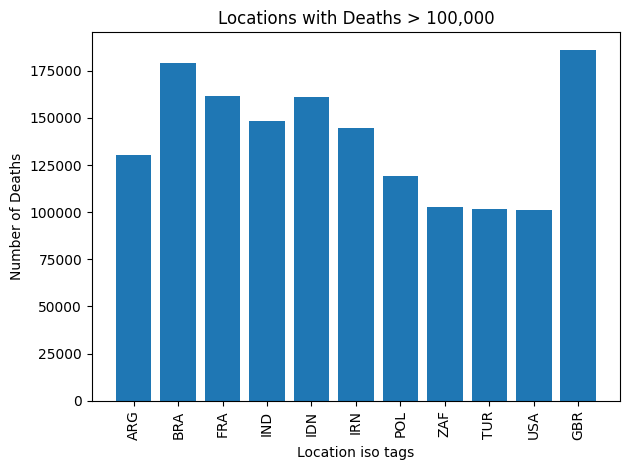

In [105]:
import matplotlib.pyplot as plt

# 'dataframeReportsLocation'
filtered_data = dataframeReports[dataframeReports['deaths'] > 100000]

plt.bar(filtered_data['iso'], filtered_data['deaths'])
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Location iso tags')
plt.ylabel('Number of Deaths')
plt.title('Locations with Deaths > 100,000')
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

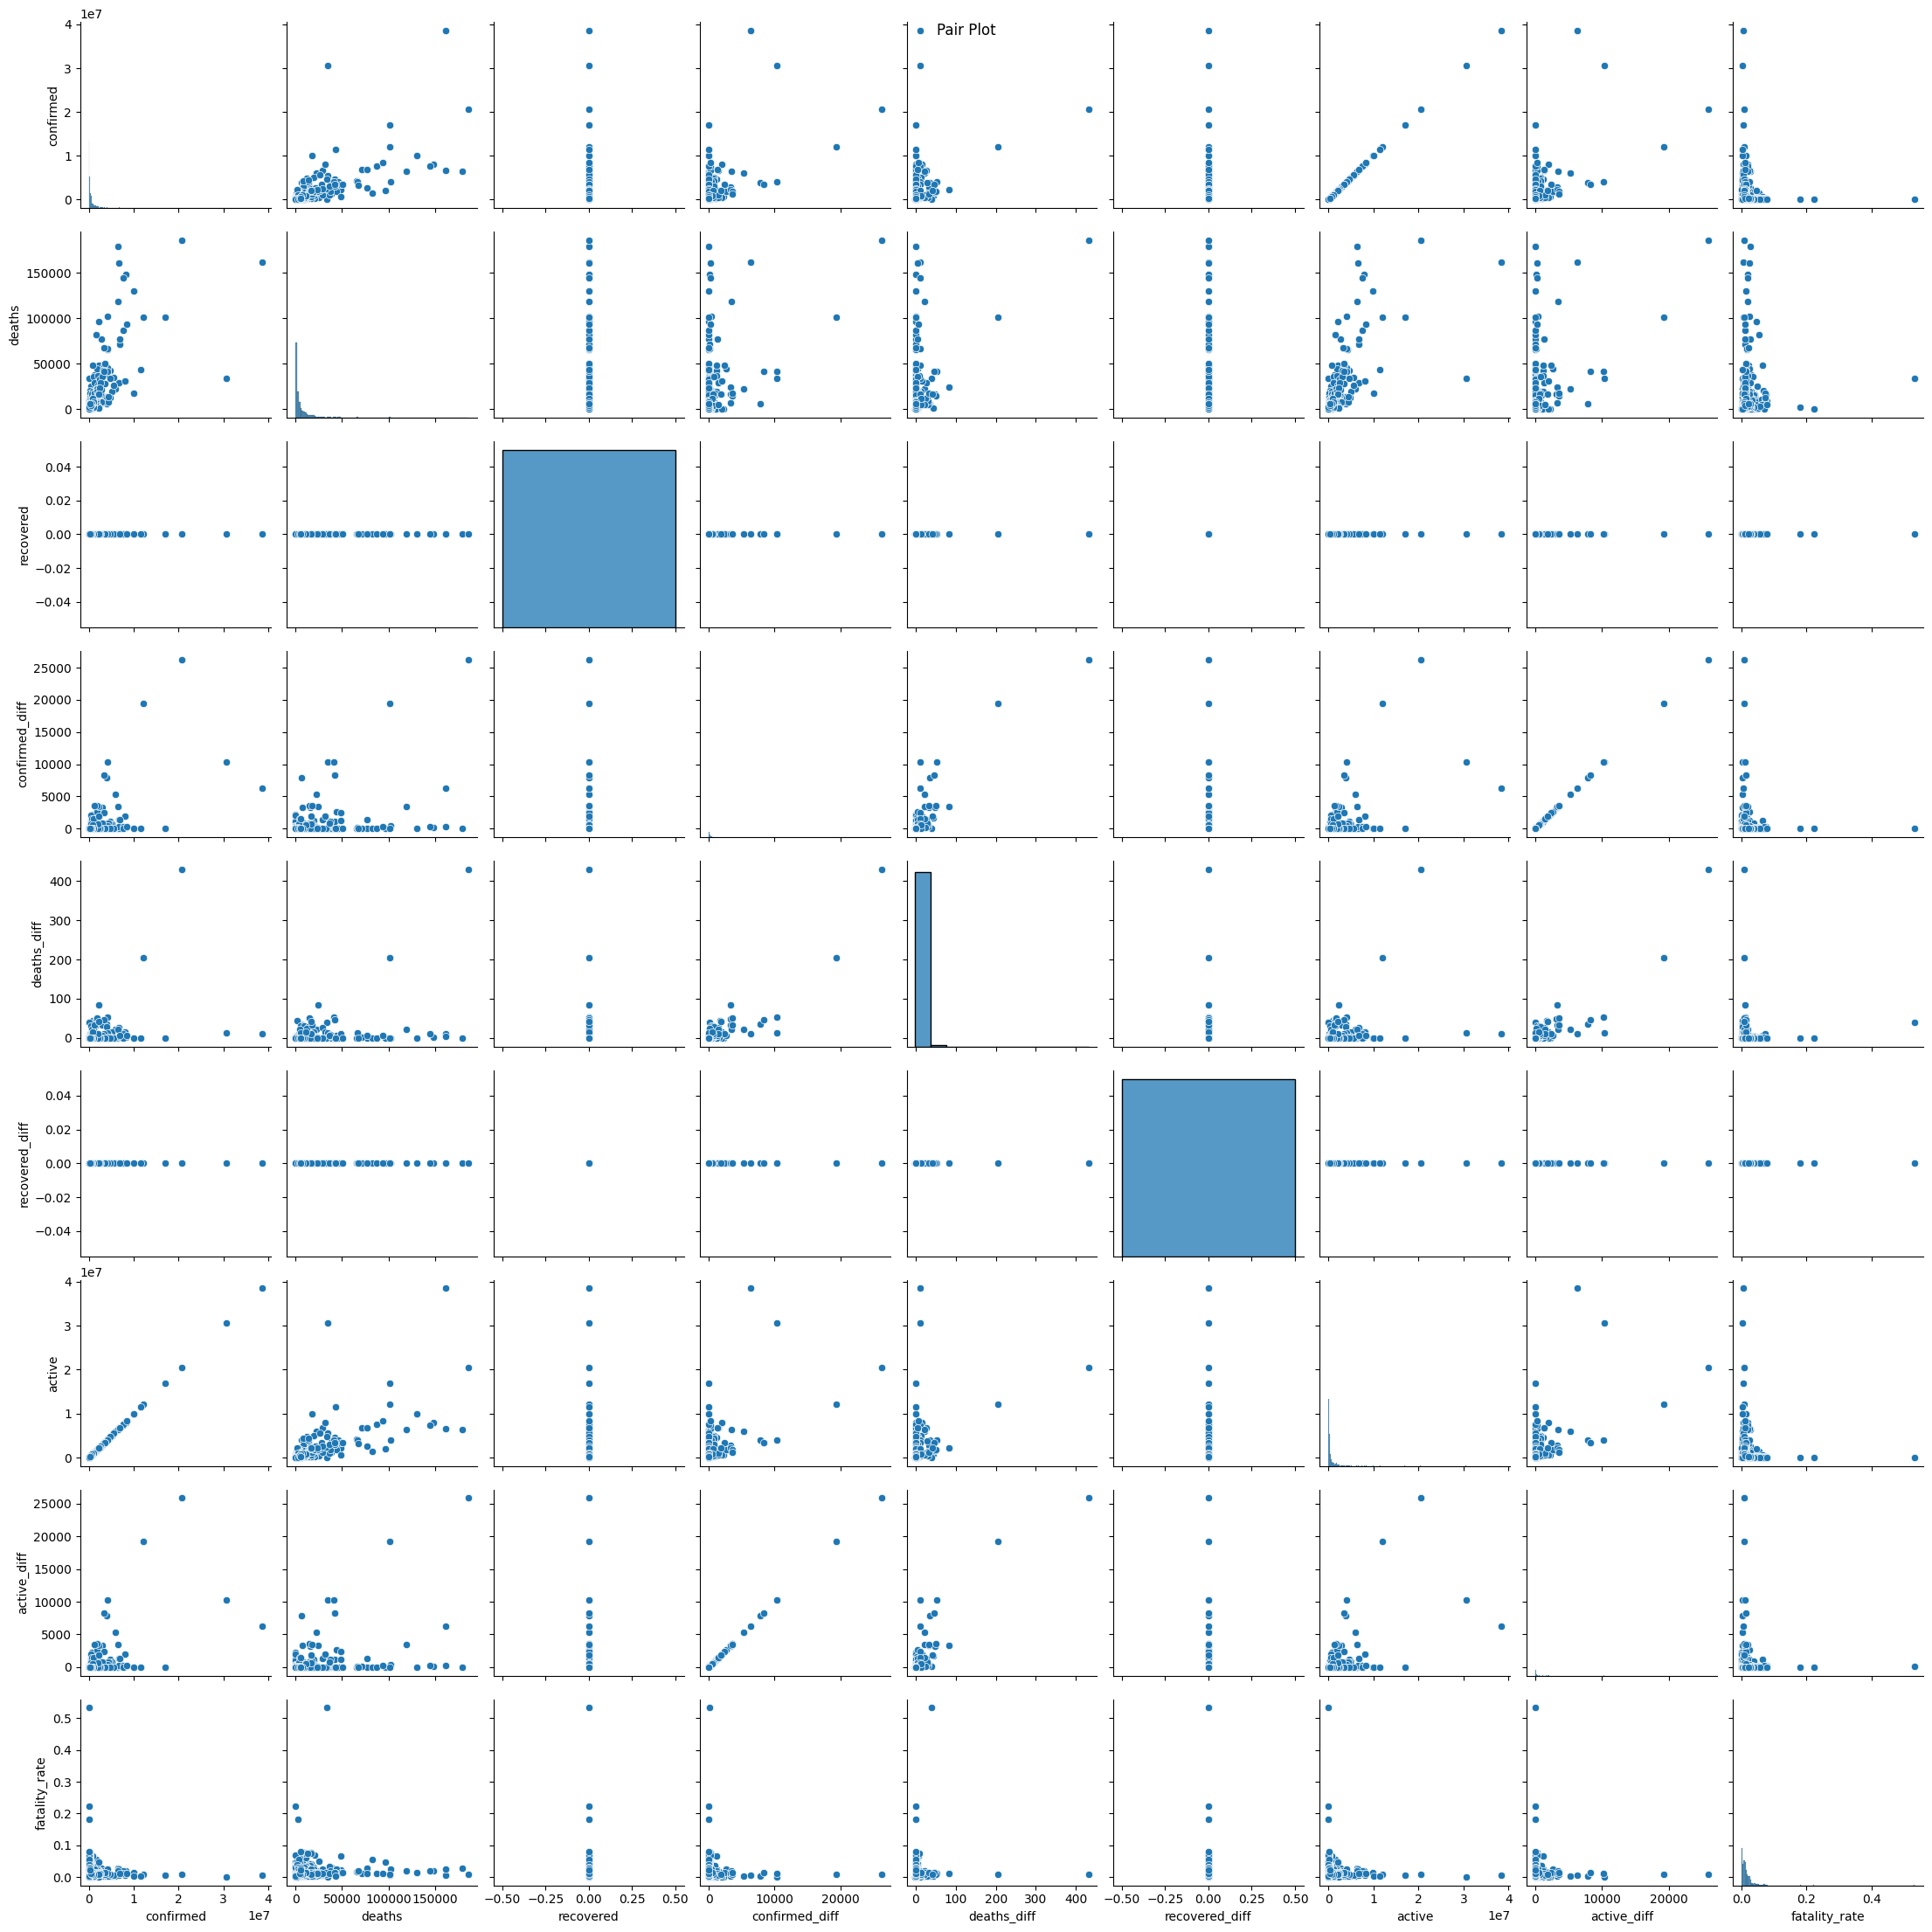

In [106]:
#pair plot investigation of dataframeReports

sns.pairplot(dataframeReports)
plt.suptitle('Pair Plot')
plt.show()

In [ ]:
# there are many plots with zeros (horizontal or vertical lines). some are concentrated closer to the origins

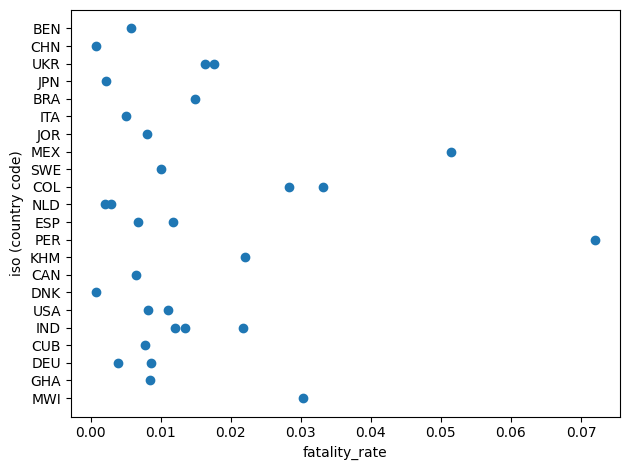

In [108]:
# scatter plot
np.random.seed(123)
dataframeReportssample = dataframeReports.sample(30)

plt.scatter(dataframeReportssample['fatality_rate'],dataframeReportssample['iso'])

plt.xlabel('fatality_rate')
plt.ylabel('iso (country code)')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Axes: >

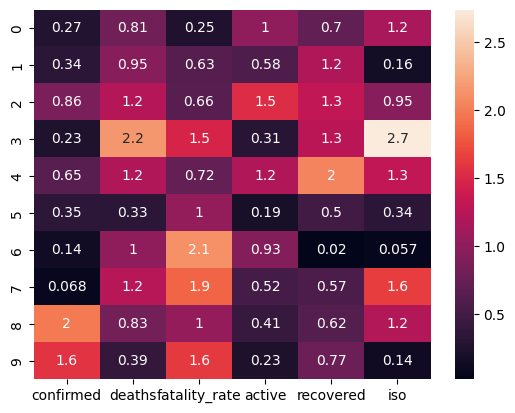

In [109]:
import numpy as np
from pandas import DataFrame
import seaborn as sns
%matplotlib inline

sample_size =10
Rows_number= ['0','1', '2', '3', '4', '5', '6', '7', '8', '9']

Cols = ['confirmed','deaths', 'fatality_rate', 'active','recovered', 'iso']
Cols_number=len(Cols)

df = DataFrame(abs(np.random.randn(sample_size, Cols_number)), index=Rows_number, columns=Cols)




sns.heatmap(df, annot=True)

<ipython-input-110-f673b5cf8f03>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataframeReports.corr()


<Axes: >

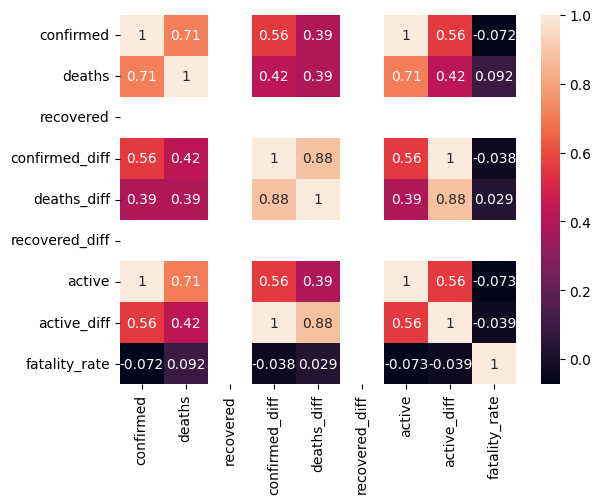

In [110]:
import seaborn as sb
corr = dataframeReports.corr()
sb.heatmap(corr, annot=True)


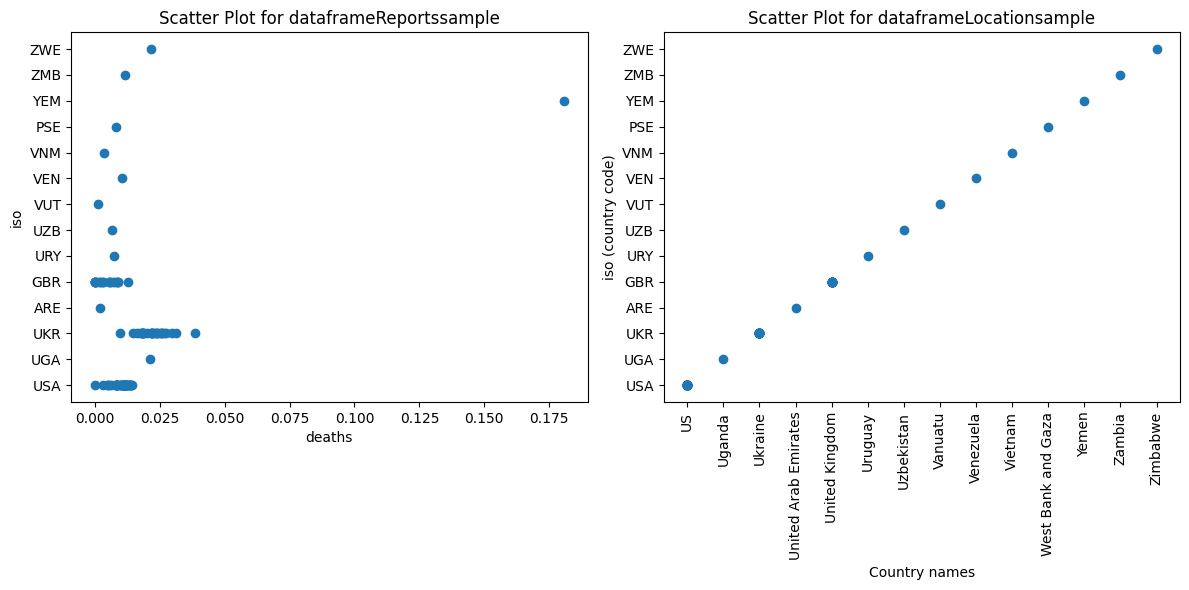

In [111]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)
dataframeReportssample = dataframeReports.tail(100)
dataframeLocationsample = dataframeLocation.tail(100)

# Creating a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Subplot for 'dataframeReportssample'
axes[0].scatter(dataframeReportssample['fatality_rate'], dataframeReportssample['iso'])
axes[0].set_xlabel('deaths')
axes[0].set_ylabel('iso')
axes[0].set_title('Scatter Plot for dataframeReportssample')

# Subplot for 'dataframeLocationsample'
axes[1].scatter(dataframeLocationsample['name'], dataframeLocationsample['iso'])
axes[1].set_xlabel('Country names')
plt.xticks(rotation=90)
axes[1].set_ylabel('iso (country code)')
axes[1].set_title('Scatter Plot for dataframeLocationsample')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [ ]:
# let us further investigate dataframeReports using profiling (we dont investigate dataframeLocation as actual data of covid-19 is inside dataframeReports)

In [112]:
#create a csv file
dataframeReports.to_csv('https://raw.githubusercontent.com/venuannamdas/mini_proj/master/forprofilingpurposecorrected.csv', sep=',', index=False, encoding='utf-8')

In [113]:
import pandas as pd
url = 'https://raw.githubusercontent.com/venuannamdas/mini_proj/master/forprofilingpurposecorrected.csv'
df = pd.read_csv(url)


In [42]:
!pip install pandas_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 25.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=5c7e87e0973e65d63dbb5d680e362fce298cae4c2d1cb4e63aa505a4f967f4d3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [114]:
from ydata_profiling import ProfileReport

In [115]:
profile = ProfileReport(df, title="Pandas Profiling Report for dataframeReports", html={'style': {'full_width': True}})
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
''' SQL Database Integration:
   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.
   '''

' SQL Database Integration:\n   - Set up a SQL database (e.g., SQLite or MySQL) using Python and store the preprocessed data into the database.\n   '

In [134]:
connection =sqlite3.connect("SQLfolder\DataAnalytics2023.db")

In [135]:
cursor = connection.cursor()

In [136]:
#dataframeReports  to sql table
dataframeReports.to_sql('covid_reports', connection, if_exists='replace', index = False)

791

In [137]:
query = 'Select  DISTINCT date, iso, max(deaths) FROM covid_reports'
cursor.execute(query)
cursor.fetchall()

[('2023-03-09 00:00:00', 'GBR', 186138)]

In [138]:
query1 = "SELECT DISTINCT iso, fatality_rate FROM covid_reports ORDER BY deaths DESC LIMIT 10"

cursor.execute(query1)
result1 = cursor.fetchall()

print("Higher fatality rate need not always have higher deaths, as proved below:")
print(f"From deaths between 10000 AND 20000 occurred {len(result1)} times")
print("iso, fatality_rate")
for row in result1:
    iso, fatality_rate = row
    print(f"{iso}, {fatality_rate}")

Higher fatality rate need not always have higher deaths, as proved below:
From deaths between 10000 AND 20000 occurred 10 times
iso, fatality_rate
GBR, 0.009
BRA, 0.0277
IDN, 0.0239
IND, 0.0182
IRN, 0.0191
ARG, 0.013
POL, 0.0185
ZAF, 0.0252
TUR, 0.006
USA, 0.0083


In [139]:
query = 'Select  COUNT(deaths), iso FROM covid_reports WHERE iso=="IND" AND deaths BETWEEN 10000 AND 20000'
cursor.execute(query)
cursor.fetchall()

[(7, 'IND')]

In [140]:
query1 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 2500 AND 5000;
'''

query2 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 500 AND 2500;
'''

query3 = '''
    SELECT COUNT(deaths) FROM covid_reports
    WHERE iso = 'IND' AND deaths BETWEEN 100 AND 500;
'''
cursor.execute(query1)
result1 = cursor.fetchall()

cursor.execute(query2)
result2 = cursor.fetchall()

cursor.execute(query3)
result3 = cursor.fetchall()

# Now you have the results for both queries in result1 and result2
print(f"In INDIA, deaths between 2500 AND 5000 occured {result1} times")
print(f"          deaths between 500 AND 2500 occured {result2} times")
print(f"          deaths between 100 AND 500 occured {result3} times")

In INDIA, deaths between 2500 AND 5000 occured [(4,)] times
          deaths between 500 AND 2500 occured [(8,)] times
          deaths between 100 AND 500 occured [(4,)] times


In [141]:
#dataframeLocation  to sql table
dataframeLocation.to_sql('covid_location', connection, if_exists='replace', index = False)

791

In [142]:
query = 'Select  covid_reports.deaths, covid_location.name, covid_location.iso, covid_location.lat, covid_location.long FROM covid_reports join covid_location ON covid_reports.iso=covid_location.iso LIMIT 10'
cursor.execute(query)
cursor.fetchall()

[(7896, 'Afghanistan', 'AFG', '33.9391', '67.7100'),
 (3598, 'Albania', 'ALB', '41.1533', '20.1683'),
 (6881, 'Algeria', 'DZA', '28.0339', '1.6596'),
 (165, 'Andorra', 'AND', '42.5063', '1.5218'),
 (1933, 'Angola', 'AGO', '-11.2027', '17.8739'),
 (146, 'Antigua and Barbuda', 'ATG', '17.0608', '-61.7964'),
 (130472, 'Argentina', 'ARG', '-38.4161', '-63.6167'),
 (8727, 'Armenia', 'ARM', '40.0691', '45.0382'),
 (228, 'Australia', 'AUS', '-12.4634', '130.8456'),
 (228, 'Australia', 'AUS', '-28.0167', '153.4000')]

In [143]:
query = 'SELECT  covid_location.name, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso ORDER BY covid_location.name DESC LIMIT 25'
cursor.execute(query)
cursor.fetchall()

[('Zimbabwe', 5671, '-19.0154', '29.1549'),
 ('Zambia', 4057, '-13.1339', '27.8493'),
 ('Yemen', 2159, '15.552726999999999', '48.516388'),
 ('West Bank and Gaza', 5708, '31.9522', '35.2332'),
 ('Vietnam', 43186, '14.0583', '108.2772'),
 ('Venezuela', 5854, '6.4238', '-66.5897'),
 ('Vanuatu', 14, '-15.3767', '166.9592'),
 ('Uzbekistan', 1637, '41.3775', '64.5853'),
 ('Uruguay', 7617, '-32.5228', '-55.7658'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 0, '18.2206', '-63.0686'),
 ('United Kingdom', 8, '18.2206', '-63.0686'),
 ('United Kingdom', 12, '18.2206', '-63.0686'),
 ('United Kingdom', 37, '18.2206', '-63.0686'),
 ('United Kingdom', 38, '18.2206', '-63.0686'),
 ('United Kingdom', 64, '18.2206', '-63.0686'),
 ('United Kingdom', 66, '18.2206', '-63.0686'),
 ('United Kingdom', 111, '18.2206', '-63.0686'),
 ('United Kingdom', 116, '18.2206', '-63.0686'),
 ('United Kingdo

In [144]:
query = 'SELECT  covid_location.name AS COUNTRY_NAME, covid_reports.deaths AS DEATHS, covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE FROM covid_location JOIN covid_reports ON covid_location.iso=covid_reports.iso limit 1'
cursor.execute(query)
cursor.fetchall()

[('Afghanistan', 7896, '33.9391', '67.7100')]

# BELOW IS THE CODE FOR LOCATING ANY COUNTRY/COUNTRIES USING LATITUDE AND LONGITUDE.

In [145]:
# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS country_name,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 791"
cursor.execute(query)

# Fetch rows UPTO 50
ROWS=50 #CAN BE CHANGED BASED ON YOUR CHOICE
rows = cursor.fetchmany(ROWS)

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"A city in the Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


In [146]:
# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS country_name,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 791"
cursor.execute(query)

# Fetch rows UPTO 50
ROWS=50 #CAN BE CHANGED BASED ON YOUR CHOICE
rows = cursor.fetchmany(ROWS)

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"A city in the Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


In [125]:
import pandas as pd
import folium

# Assuming you have established a database connection and have a cursor object named 'cursor'

# Execute the SQL query to fetch data from the database
query = "SELECT covid_location.name AS COUNTRY_NAME,  covid_location.lat AS LATITUDE, covid_location.long AS LONGITUDE, covid_reports.deaths AS DEATHS FROM covid_location JOIN covid_reports ON covid_location.iso = covid_reports.iso LIMIT 100"
cursor.execute(query)

rows = cursor.fetchall()

# Convert the result set into a Pandas DataFrame for easier manipulation
columns = ['country_name', 'latitude', 'longitude', 'deaths']
df = pd.DataFrame(rows, columns=columns)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Mark each country on the map
for _, country_data in df.iterrows():
    folium.Marker(
        location=[country_data['latitude'], country_data['longitude']],
        popup=f"Country: {country_data['country_name']}<br><br>Deaths: {country_data['deaths']}",
        tooltip=country_data['country_name']
    ).add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")


Finally, Required data will be shown on the world map: click the blue markers for info (on the html file)

In [147]:
import pandas as pd
import folium

def fetch_data_from_database(cursor):
    query = """
        SELECT
            cl.name AS COUNTRY_NAME,
            cl.lat AS LATITUDE,
            cl.long AS LONGITUDE,
            cr.deaths AS DEATHS,
            cr.fatality_rate AS FATALITY_RATE,
            cr.confirmed AS CONFIRMED,
            cr.active AS ACTIVE
        FROM covid_location AS cl
        JOIN covid_reports AS cr ON cl.iso = cr.iso
        LIMIT 100
    """
    cursor.execute(query)
    rows = cursor.fetchall()
    return rows

def create_map_marker(country_data):
    country_name, latitude, longitude, deaths, fatality_rate, confirmed, active = country_data
    popup_content = (
        f"<b>Country:</b> {country_name}<br>"
        f"<b>Deaths:</b> {deaths}<br>"
        f"<b>Fatality Rate:</b> {fatality_rate}<br>"
        f"<b>Confirmed Cases:</b> {confirmed}<br>"
        f"<b>Active Cases:</b> {active}"
    )
    marker = folium.Marker(
        location=[latitude, longitude],
        popup=folium.Popup(html=popup_content, parse_html=True),
        tooltip= [country_name, deaths, fatality_rate, confirmed, active]

    )
    return marker


#cursor = connection.cursor()  # Replace with your cursor initialization

# Fetch data from the database
data = fetch_data_from_database(cursor)

# Initialize the map
world_map = folium.Map(location=[0, 0], zoom_start=2)

# Add markers to the map
for country_data in data:
    marker = create_map_marker(country_data)
    marker.add_to(world_map)

# Save the map to an HTML file
world_map.save("covid_data_map.html")



In [ ]:
# Close the database connection when done
connection.close()